In [107]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

### KeplerMapper

In [75]:
# Import the library
import kmapper as km

#### Example: Two Circles

In [92]:
# read the csv data
# input data format: np.array
two_circles = pd.read_csv("data/two-circle.csv")
two_circles = np.array(two_circles)
print(two_circles)

[[ 0.01252324  0.27522969]
 [ 0.21626457  0.98100871]
 [ 0.86886945 -0.42378188]
 ...
 [ 0.05611042  0.22961431]
 [ 0.97984991  0.1208084 ]
 [ 0.41900245 -0.92513889]]


(-1.185921869922115,
 1.2059820474680476,
 -1.214995855101575,
 1.1769080622885877)

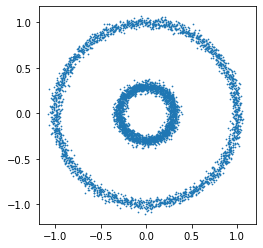

In [93]:
# plot the point cloud
plt.scatter(two_circles[:,0], two_circles[:,1], s=0.5)
plt.axis('square')

In [78]:
# Initialize mapper
mapper = km.KeplerMapper()

In [94]:
# Fit to and transform the data to creates the filter functions (projection/lens) from the data
# One filter function: n x 1 array
# d filter functions: n x d array
lens = mapper.fit_transform(two_circles, projection=[0]) # n x 1 array of X coordinate values for each data point

In [95]:
print(lens)

[[0.51003349]
 [0.60524183]
 [0.91020415]
 ...
 [0.53040179]
 [0.96206533]
 [0.69998126]]


In [96]:
# Create a cover object with 15 intervals with 25% overlap rate
cover = km.Cover(n_cubes=15, perc_overlap=0.25)

In [97]:
# Clustering algorithm and parameters
# eps: the max distance between two points for one to be considered as in the neighborhood of the other.
# min_samples: the min number of points in a neighborhood for a point to be considered as a core point.
from sklearn.cluster import DBSCAN
clusterer = DBSCAN(eps=0.1, min_samples=5)

In [98]:
# Create a graph dictionary with nodes, edges and meta-information
graph = mapper.map(lens=lens, X=two_circles, cover=cover, clusterer=clusterer)
print(graph)

{'nodes': defaultdict(<class 'list'>, {'cube0_cluster0': [14, 27, 31, 32, 33, 44, 56, 68, 73, 80, 92, 96, 121, 122, 149, 175, 191, 197, 201, 204, 208, 228, 253, 257, 263, 276, 281, 282, 295, 297, 314, 321, 347, 358, 377, 383, 418, 428, 432, 433, 452, 457, 465, 469, 473, 475, 496, 513, 540, 553, 563, 569, 598, 612, 625, 655, 672, 700, 710, 735, 739, 754, 757, 761, 783, 787, 789, 815, 816, 845, 856, 860, 861, 874, 878, 880, 910, 926, 956, 958, 986, 988, 994, 1025, 1035, 1039, 1088, 1105, 1118, 1126, 1140, 1142, 1156, 1160, 1170, 1179, 1184, 1185, 1187, 1196, 1198, 1210, 1211, 1212, 1229, 1244, 1257, 1259, 1265, 1310, 1335, 1337, 1350, 1370, 1379, 1392, 1393, 1399, 1408, 1416, 1429, 1444, 1482, 1484, 1530, 1570, 1599, 1641, 1670, 1675, 1690, 1699, 1700, 1715, 1724, 1739, 1779, 1784, 1810, 1815, 1825, 1832, 1847, 1859, 1863, 1872, 1877, 1905, 1917, 1926, 1970, 1983, 1986, 2000, 2017, 2065, 2068, 2075, 2080, 2095, 2096, 2112, 2118, 2147, 2154, 2156, 2157, 2172, 2205, 2206, 2215, 2227, 2254,

In [109]:
# make sure the output folder exists
if not os.path.exists('output'):
    os.makedirs('output')

In [99]:
# Visualize the output graph
# coloring function: color_values - list or a 1D array, color_function_name - customize function name 
html = mapper.visualize(graph, color_values=lens, color_function_name='x', 
                        path_html="output/two_circles.html", title="Two Circles")

#### Choose a lens

In [100]:
# lens: projection being a string
lens = mapper.fit_transform(two_circles, projection='mean') # mean value of the x and y coordinates
graph = mapper.map(lens=lens, X=two_circles, cover=cover, clusterer=clusterer)
html = mapper.visualize(graph, color_values=lens, color_function_name='mean', 
                        path_html="output/two_circles_mean.html", title="Two Circles")

In [102]:
# lens: projection being a Scikit-learn class
from sklearn.decomposition import PCA # dimensioanlity reduction
lens = mapper.fit_transform(two_circles, projection=PCA(n_components=1)) # 1st principle component
graph = mapper.map(lens=lens, X=two_circles, cover=cover, clusterer=clusterer)
html = mapper.visualize(graph, color_values=lens, color_function_name='PCA',
                        path_html="output/two_circles_PCA.html", title="Two Circles")

In [110]:
# lens: generate lens manually
# density estimation
from sklearn.neighbors import KernelDensity
kde = KernelDensity(bandwidth=0.1).fit(two_circles)
lens = kde.score_samples(two_circles).reshape(-1,1) # 5000 x 1
print(lens)
graph = mapper.map(lens=lens, X=two_circles, cover=cover, clusterer=clusterer)
html = mapper.visualize(graph, color_values=lens, color_function_name='KDE', 
                        path_html="output/two_circles_KDE.html", title="Two Circles")

[[ 0.04641421]
 [-1.1822417 ]
 [-1.17018782]
 ...
 [-0.03339416]
 [-1.1811809 ]
 [-1.21489887]]


In [117]:
# 2D Mapper
# lens: 5000 x 2
lens = mapper.fit_transform(np.array(two_circles), projection=[0, 1]) # x and y coordinates
print(lens)
graph = mapper.map(lens=lens, X=two_circles, cover=cover, clusterer=clusterer)
html = mapper.visualize(graph, color_values=two_circles[:,1], color_function_name='y', 
                        path_html="output/two_circles_2D.html", title="Two Circles")

[[0.51003349 0.63533192]
 [0.60524183 0.95990889]
 [0.91020415 0.3138672 ]
 ...
 [0.53040179 0.6143541 ]
 [0.96206533 0.56431593]
 [0.69998126 0.08330078]]


#### Additional ways to visualize the mapper graph

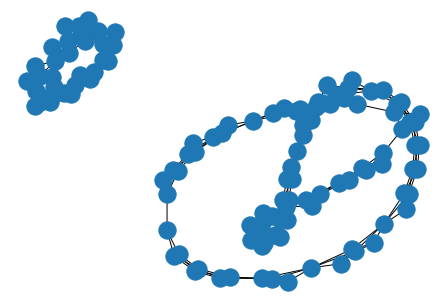

In [118]:
# nx adapter
# no interactivity
import networkx as nx
nx_graph = km.adapter.to_nx(graph) # convert the graph to a networkx graph representation
nx.draw(nx_graph) # 2D mapper

In [119]:
# Plotly
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [120]:
from kmapper.plotlyviz import plotlyviz
plotlyviz(graph, title="Dashboard plot", dashboard=True)

    'data': [{'hoverinfo': 'none',
              'line': {'color'…

#### Example: 3D horse

In [131]:
horse_df = pd.read_csv("data/3d-horse.csv")
horse_df = np.array(horse_df)
print(horse_df)

[[0.44602612 0.66580727 0.16294031]
 [0.46765111 0.67202003 0.16383805]
 [0.44105487 0.65858006 0.15922624]
 ...
 [0.63314675 0.25008528 0.00354441]
 [0.63050537 0.25279783 0.00677666]
 [0.28105311 0.61631424 0.16342021]]


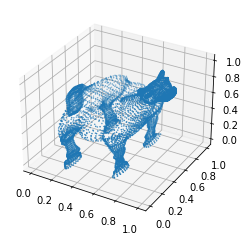

In [129]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(horse_df[:,2], horse_df[:,0], horse_df[:,1], s=0.3)

In [130]:
lens = mapper.fit_transform(np.array(horse_df), projection=[1]) # y coordinates (height)
cover = km.Cover(n_cubes=10, perc_overlap=0.2)
graph = mapper.map(lens=lens, X=horse_df, cover=cover, clusterer=DBSCAN(eps=0.1, min_samples=5))
html = mapper.visualize(graph, color_values=lens, color_function_name='height', 
                        path_html="output/3d_horse.html", title="3D Horse")

### Giotto-TDA

#### Configure the Mapper pipeline

1. Choose a filter function

In [132]:
from gtda.mapper.filter import Projection
filter_func = Projection(columns=[0, 1])

2. Construct a cover

In [133]:
from gtda.mapper.cover import CubicalCover
cover = CubicalCover(n_intervals=10, overlap_frac=0.3)

3. Choose a clustering algorithm

In [134]:
from sklearn.cluster import DBSCAN
clusterer = DBSCAN()

4. Initialise mapper pipeline

In [135]:
from gtda.mapper import make_mapper_pipeline

# Configure parallelism of clustering step
n_jobs = 1

pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)

#### Visualize the mapper graph

1. Static visualization

In [139]:
from gtda.mapper import plot_static_mapper_graph
fig = plot_static_mapper_graph(pipe, two_circles, color_data=two_circles[:,0])
fig.show(config={'scrollZoom': True})

In [140]:
# Configure the coloring
plotly_params = {"node_trace": {"marker_colorscale": "Blues"}}
fig = plot_static_mapper_graph(
    pipe, two_circles, color_data=two_circles, plotly_params=plotly_params
)
fig.show(config={'scrollZoom': True})

In [152]:
# Update node_color_statistic
plotly_params = {"node_trace": {"marker_colorscale": "Blues"}}
fig = plot_static_mapper_graph(
    pipe, two_circles, color_data=two_circles, plotly_params=plotly_params, node_color_statistic=lambda x: np.sum(x)
)
fig.show(config={'scrollZoom': True})

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   0.1s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.0s


In [144]:
# coloring by a scikit-learn transformer
from sklearn.decomposition import PCA 
# Initialise estimator to color graph by
pca = PCA(n_components=1)

fig = plot_static_mapper_graph(
    pipe, two_circles, color_data=two_circles, color_features=pca
)
fig.show(config={'scrollZoom': True})

In [145]:
# 3D visualization
fig = plot_static_mapper_graph(pipe, two_circles, layout_dim=3, color_data=two_circles)
fig.show(config={'scrollZoom': True})

2. Visualize the 2D Mapper graph interactively

In [153]:
from gtda.mapper import MapperInteractivePlotter, plot_interactive_mapper_graph
pipe = make_mapper_pipeline()

# Generate interactive widget
plot_interactive_mapper_graph(pipe, two_circles, color_data=two_circles)

# Create the plotter object
MIP = MapperInteractivePlotter(pipe, two_circles)

# Generate interactive widget
MIP.plot(color_data=two_circles)

#### Update intermediate steps with Pipeline

In [155]:
pipe.set_params(cover=CubicalCover(n_intervals=5, overlap_frac=0.5))
fig = plot_static_mapper_graph(pipe, two_circles, color_data=two_circles[:,0])
fig.show(config={'scrollZoom': True})

#### customize filter functions

In [156]:
filter_func = np.sum

pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=True,
    n_jobs=n_jobs,
)

In [157]:
fig = plot_static_mapper_graph(pipe, two_circles, color_data=two_circles[:,0])
fig.show(config={'scrollZoom': True})

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   0.1s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.0s
